In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
poll_data = pd.read_csv('../../data/mlcourse_open_first_survey_parsed.csv',
                       index_col='id')

In [3]:
poll_data.head(2)

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [4]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
Timestamp                                                                                                                                   2944 non-null object
Представьтесь в 2-3 фразах                                                                                                                  2944 non-null object
Работали ли Вы с Jupyter notebooks?                                                                                                         2931 non-null object
Что Вы ждете от курса?                                                                                                                      2944 non-null object
Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?                                           2640 non-null object
Ладно, посерьезней: согласны ли Вы на обработку персональных данных?                    

In [5]:
poll_data.shape

(2944, 14)

In [8]:
for i in poll_data['Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?']:
    print (i)

Starcraft
nan
basketball
nan
футбол
Теннис
MMA
Футбол
nan
starcraft 2
:parrotdancing:
бег
Сноубординг
Ориентирование
nan
dota
шахматы
Хах, ну пусть будет биатлон (хотя, мне кажется, я не поняла прикола)
Волейбол
фигурное катание
Биатлон
Батл-Рэп
dota считается?))
Mountain Bike
велоспорт
Сквош
Lacrosse
nan
Сноуборд
баскетбол
фрифлай
nan
formula 1
Formula 1
Хоккей
не слежу за спортом как индустрией
F1
Бег
Сквош
лижи
Формула 1, данные есть, много
Шахматы.
Стесняюсь сказать
Литробол. Голубые роботы вперед! Ну также теннис, шахматы и  крав мага
nan
Хоккей (хотя доту предсказывать тоже было прикольно)
Wineball (датасет с винишком)
nan
nan
велосипед!
футбол
Горнолыжный спорт
Фехтование
киберспорт, видимо :)
бокс
Бейсбол :trollface:
Бобслей
Тяжелая атлетика
Шахматы
Триатлон и лыжи
Формула 1, Civilization 5, серия Battlefield
Ходьба
Тяжёлая атлетика
Баскетбол
теннис
легкая атлетика
Волейбол
Волейбол
Олимпиадное программирование
велосипедный
Бег
Смешанные единоборства 
Биатлон. Но его неинтересн

**Переименуем признаки.**

In [12]:
rename_dic = dict(zip(poll_data.columns, 
                      ['time', 'intro', 'jupyter', 'expect',
                       'sport', 'personal', 'math_level', 'quest1',
                       'quest2', 'quest3', 'fib_gen', 'python', 
                       'github', 'movie']))

In [10]:
rename_dic

{'Timestamp': 'time',
 'Представьтесь в 2-3 фразах': 'intro',
 'Работали ли Вы с Jupyter notebooks?': 'jupyter',
 'Что Вы ждете от курса?': 'expect',
 'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?': 'sport',
 'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?': 'personal',
 'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)': 'math_level',
 'Чему равна дисперсия равномерного на [0,6] распределения?': 'quest1',
 'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]': 'quest2',
 'Сколько параметров у нормального распределения?': 'quest3',
 'Сможете написать на Python генератор чисел Фибоначчи?': 'fib_gen',
 'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro': 'python',
 'Оцените свой уровень владения GitHub': 'github',
 'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)': 'movie'}

In [13]:
poll_data.rename(columns=rename_dic, inplace=True)

In [14]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [15]:
poll_data['jupyter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [24]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2).unique()

array([1., 2., 0.])

In [33]:
jupyer_levels = poll_data['jupyter'].map({'Да': 1, 
                                          'Нет': 0}).fillna(2)

In [34]:
jupyer_levels.head()

id
0    1.0
1    1.0
2    1.0
3    1.0
5    1.0
Name: jupyter, dtype: float64

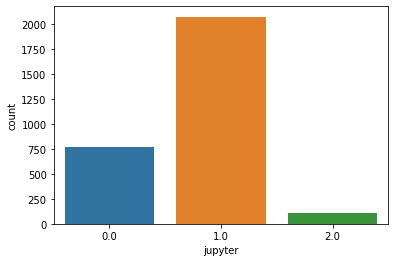

In [35]:
sns.countplot(jupyer_levels);

In [13]:
poll_data.columns

Index(['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level',
       'quest1', 'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie'],
      dtype='object')

In [14]:
poll_data.sport.value_counts().head()

Футбол       197
Баскетбол    113
футбол       113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

**Процент ответивших на 3 вопрос**

In [15]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

0.92440366972477062

**Ищем топ-10 слов в представлении себя. При этом уберем стоп-слова**

In [40]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: 
                                                        s.strip().lower().split()).values)

In [17]:
len(all_words)

26533

In [100]:
import nltk

In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [102]:
nltk.corpus.stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [103]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(
    nltk.corpus.stopwords.words('russian'))].value_counts().head(10)

студент        372
работаю        359
data           303
хочу           220
интересуюсь    189
курса          187
данных         180
занимаюсь      177
люблю          137
ml             132
dtype: int64